In [3]:
%matplotlib notebook

import csv
from pathlib import Path
from pprint import pprint
import numpy as np
import scipy.signal as signal
from matplotlib import pyplot as plt
from scipy import fftpack

In [7]:
#read data in from disk into memory
data_dir = Path('data')
trace_name = 'phone_close_on_ch5_0-842V_VCO_pin_SDS00003.csv'

data = []

past_header = False
with open(data_dir / trace_name) as file:
    csv_reader =  csv.reader(file, delimiter=',')
    for row in csv_reader:
        if row[0] == 'Second':
            past_header = True
        elif (past_header == True):
            data.append(row)



In [8]:
#now data is in memory, break into np form
data_np = np.array(data)

t = np.zeros(len(data))
t[:] = data_np[:,0]

num_channels = 2
samples = np.zeros(( len(data), num_channels  ))
samples[:,0] = (data_np[:,1])
samples[:,1] = (data_np[:,2])


ts = t[1] - t[0]
fs = 1/ts

<IPython.core.display.Javascript object>


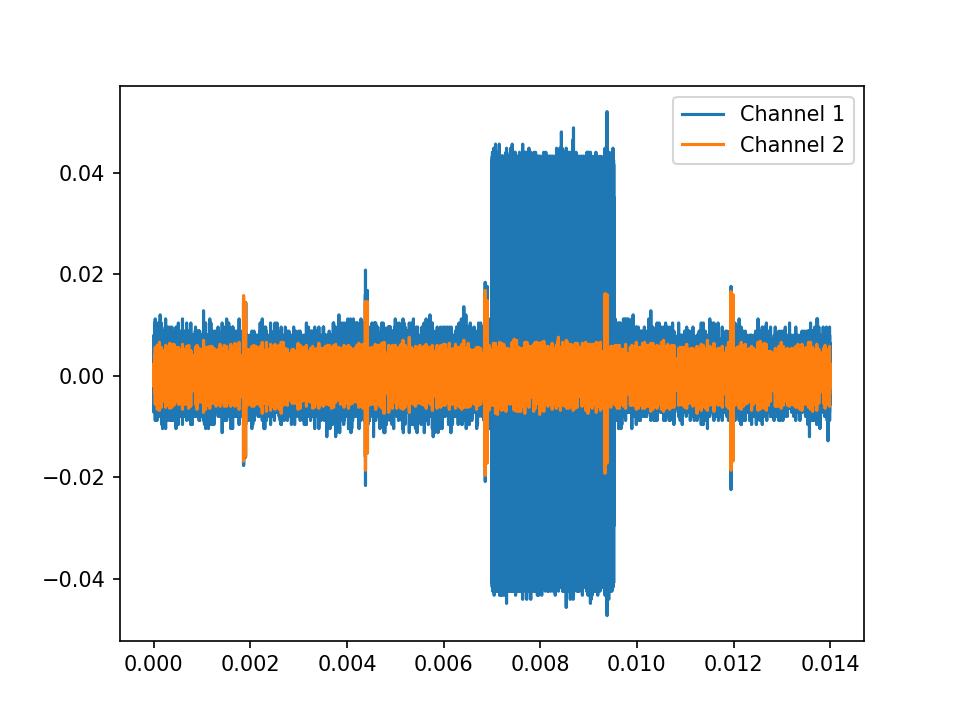

In [9]:
#
plt.figure()
plt.plot(t, samples[:,0], label='Channel 1')
plt.plot(t, samples[:,1], label='Channel 2')
plt.legend()

In [16]:
def display_spectrum_info(t, ts, fs, samples):
    # signal.welch
    f, Pxx_spec = signal.welch(samples, fs, 'flattop', 1024, scaling='spectrum')
    plt.figure()
    plt.semilogy(f, np.sqrt(Pxx_spec))
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Linear spectrum [V RMS]')
    plt.title('Power spectrum (scipy.signal.welch)')
    plt.show()

def display_time_domain_info(t, fs, samples):
    fig, (ax1, ax2) = plt.subplots(nrows=2)
    ax1.plot(t, samples)
    Pxx, freqs, bins, im = ax2.specgram(samples, NFFT=2048, Fs=fs, noverlap=900)
    # The `specgram` method returns 4 objects. They are:
    # - Pxx: the periodogram
    # - freqs: the frequency vector
    # - bins: the centers of the time bins
    # - im: the .image.AxesImage instance representing the data in the plot
    plt.show()

<IPython.core.display.Javascript object>


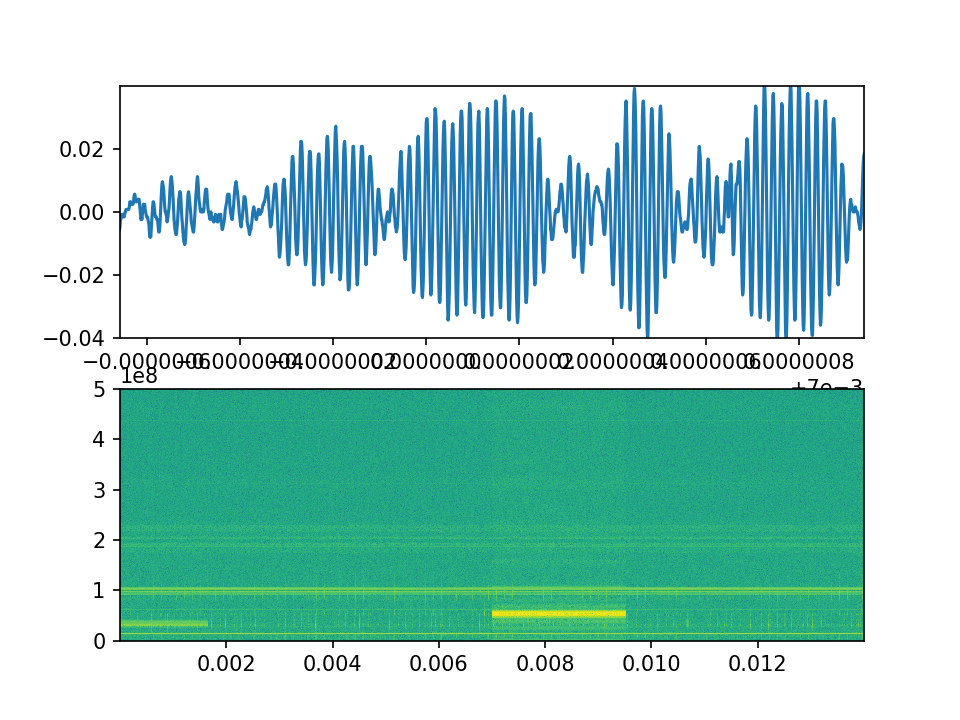

<IPython.core.display.Javascript object>


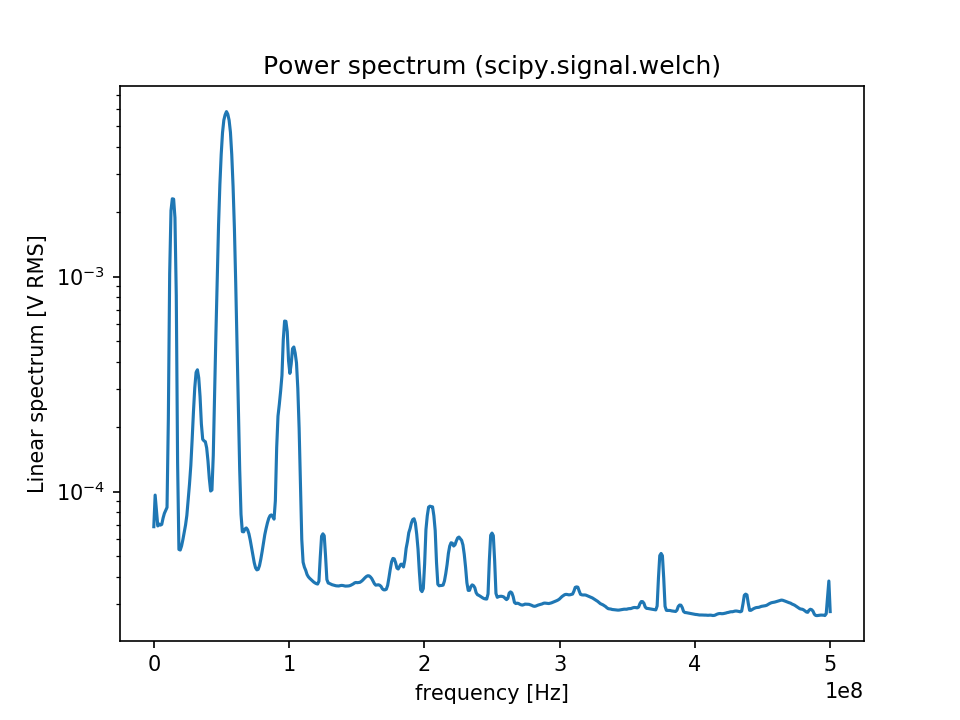

In [17]:
display_time_domain_info(t, fs, samples[:,0])
display_spectrum_info(t, ts, fs, samples[:,0])


<IPython.core.display.Javascript object>


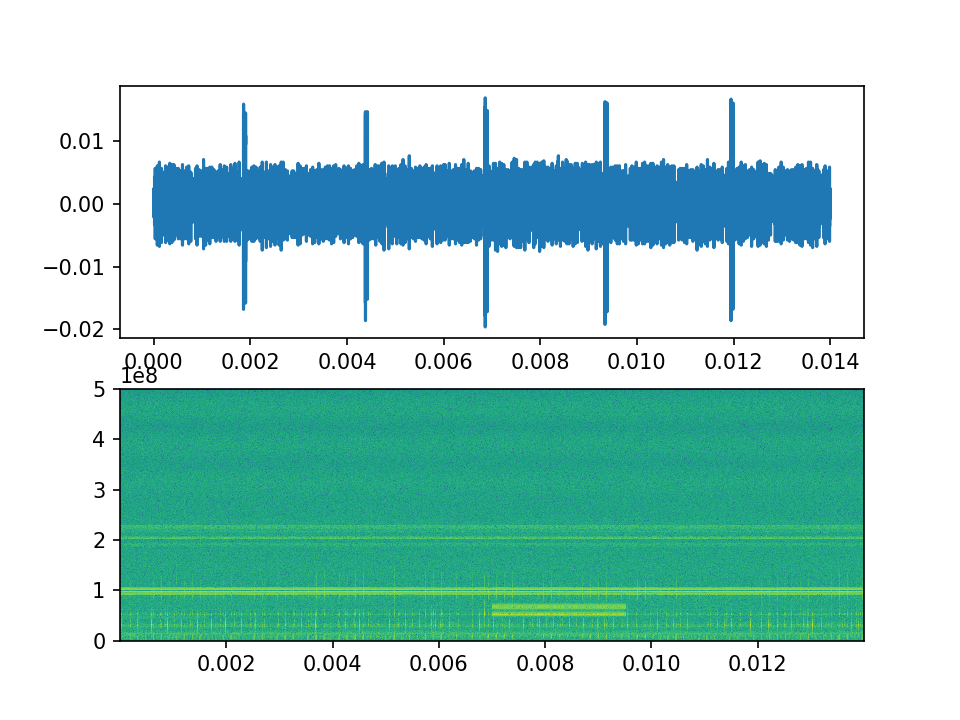

<IPython.core.display.Javascript object>


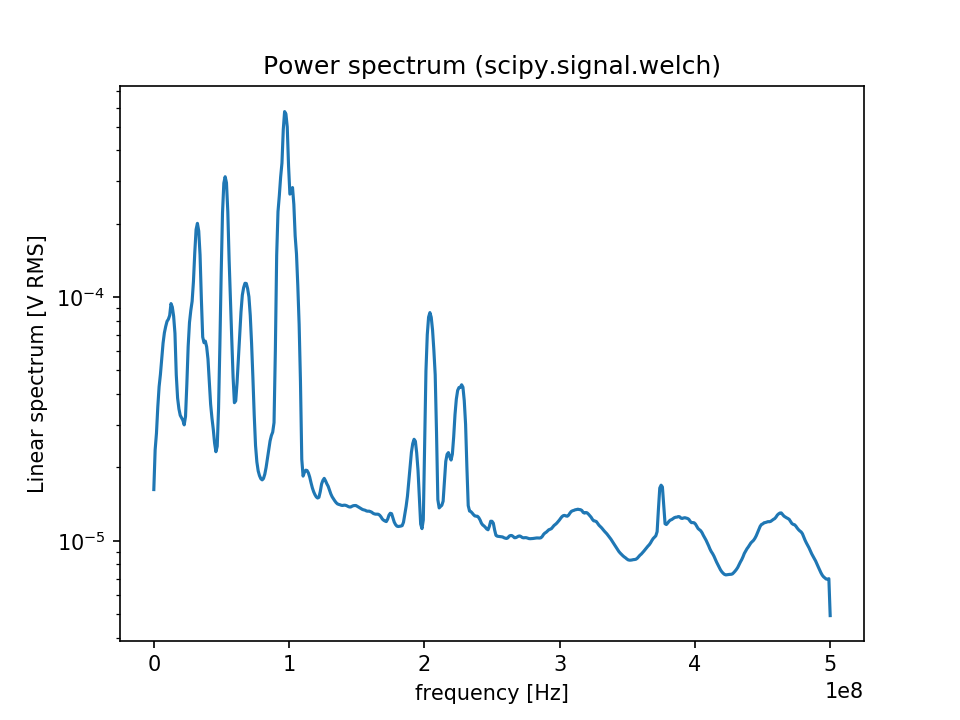

In [18]:
display_time_domain_info(t, fs, samples[:,1])
display_spectrum_info(t, ts, fs, samples[:,1])